## Processo de Limpeza

I) Tabela renda: Remoção de uma coluna desnecessária; conversão da coluna de ano para o formato de datas; conversão coluna UF para maiúscula. 

II) Tabela combustíveis: Remoção colunas que não seriam importantes; conversão da coluna data inicial para o formato de data; Remoção dos tipos de combustíveis GLP e Gasolina Aditivada, pois possuíam poucos dados coletados, então o grupo preferiu focar nos outros tipos. 


III) Tabela combustíves: Por alguma razão, o estado do Paraná estava escrito como "PANA", então eu acertei para "PR". 


IV) Criação de 5 dfs, um para cada tipo de combustível. 


V) Substituição nome extenso por sigla. 

In [9]:
import pandas as pd 

dfs = pd.read_csv(r'C:\Users\Admin\OneDrive\Área de Trabalho\Ciência de Dados\data\renda_percapita_limpa.csv', encoding = 'latin1', sep = ',')
df = pd.read_csv(r'C:\Users\Admin\OneDrive\Área de Trabalho\Ciência de Dados\2004-2021_limpo.csv')

# I 
dfs = dfs.drop(columns = dfs.columns[0])
dfs['ANO'] = pd.to_datetime(dfs['ANO'], infer_datetime_format=True) 
dfs['UF'] = dfs['UF'].str.upper()

# II 
df = df.drop(columns = {df.columns[1], df.columns[5], df.columns[6], df.columns[8], df.columns[9], df.columns[10], df.columns[11]})
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], infer_datetime_format=True) 
df = df[df.PRODUTO != 'GLP']
df = df[df.PRODUTO != 'GASOLINA ADITIVADA']

# III
df["ESTADO"] = df["ESTADO"].replace("PANA", "PR", regex=True)

# IV
df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
df_gc = df[df['PRODUTO'] == 'GASOLINA COMUM']
df_od = df[df['PRODUTO'] == 'OLEO DIESEL']
df_ods10 = df[df['PRODUTO'] == 'OLEO DIESEL S10']
df_gnv = df[df['PRODUTO'] == 'GNV']    

# IV 
dfs["UF"] = dfs["UF"].replace("RONDÔNIA", "RO", regex=True)
dfs["UF"] = dfs["UF"].replace("ACRE", "AC", regex=True)
dfs["UF"] = dfs["UF"].replace("AMAZONAS", "AM", regex=True)
dfs["UF"] = dfs["UF"].replace("RORAIMA", "RR", regex=True)
dfs["UF"] = dfs["UF"].replace("PARÁ", "PA", regex=True)
dfs["UF"] = dfs["UF"].replace("AMAPÁ", "AP", regex=True)
dfs["UF"] = dfs["UF"].replace("TOCANTINS", "TO", regex=True)
dfs["UF"] = dfs["UF"].replace("MARANHÃO", "MA", regex=True)
dfs["UF"] = dfs["UF"].replace("PIAUÍ", "PI", regex=True)
dfs["UF"] = dfs["UF"].replace("CEARÁ", "CE", regex=True)
dfs["UF"] = dfs["UF"].replace("RIO GRANDE DO NORTE", "RN", regex=True)
dfs["UF"] = dfs["UF"].replace("PARAÍBA", "PB", regex=True)
dfs["UF"] = dfs["UF"].replace("PERNAMBUCO", "PE", regex=True)
dfs["UF"] = dfs["UF"].replace("ALAGOAS", "AL", regex=True)
dfs["UF"] = dfs["UF"].replace("SERGIPE", "SE", regex=True)
dfs["UF"] = dfs["UF"].replace("BAHIA", "BA", regex=True)
dfs["UF"] = dfs["UF"].replace("MINAS GERAIS", "MG", regex=True)
dfs["UF"] = dfs["UF"].replace("ESPÍRITO SANTO", "ES", regex=True)
dfs["UF"] = dfs["UF"].replace("RIO DE JANEIRO", "RJ", regex=True)
dfs["UF"] = dfs["UF"].replace("SÃO PAULO", "SP", regex=True)
dfs["UF"] = dfs["UF"].replace("PARANÁ", "PR", regex=True)
dfs["UF"] = dfs["UF"].replace("SANTA CATARINA", "SC", regex=True)
dfs["UF"] = dfs["UF"].replace("RIO GRANDE DO SUL", "RS", regex=True)
dfs["UF"] = dfs["UF"].replace("MATO GROSSO DO SUL", "MS", regex=True)
dfs["UF"] = dfs["UF"].replace("MATO GROSSO", "MT", regex=True)
dfs["UF"] = dfs["UF"].replace("GOIÁS", "GO", regex=True)
dfs["UF"] = dfs["UF"].replace("DISTRITO FEDERAL", "DF", regex=True)

# TABELA PRINCIPAL DE COMBUSTÍVEIS 

In [2]:
df

,DATA INICIAL,REGIAO,ESTADO,PRODUTO,PRECO MEDIO REVENDA
0,2004-05-09,CENTRO OESTE,DF,ETANOL HIDRATADO,1.288
1,2004-05-09,CENTRO OESTE,GO,ETANOL HIDRATADO,1.162
2,2004-05-09,CENTRO OESTE,MT,ETANOL HIDRATADO,1.389
3,2004-05-09,CENTRO OESTE,MS,ETANOL HIDRATADO,1.262
4,2004-05-09,NORDESTE,AL,ETANOL HIDRATADO,1.181
...,...,...,...,...,...
120818,2021-04-25,NORTE,RR,OLEO DIESEL S10,4.582
120819,2021-04-25,SUL,SC,OLEO DIESEL S10,4.141
120820,2021-04-25,SUDESTE,SP,OLEO DIESEL S10,4.246
120821,2021-04-25,NORDESTE,SE,OLEO DIESEL S10,4.464


# TABELA DE RENDA 2004 A 2021 (EXCETO 2010)

In [3]:
dfs

,UF,ANO,RENDA
0,AC,2004-06-15,371
1,AL,2004-06-15,235
2,AP,2004-06-15,351
3,AM,2004-06-15,343
4,BA,2004-06-15,275
...,...,...,...
454,RR,2021-06-15,1046
455,SC,2021-06-15,1718
456,SP,2021-06-15,1836
457,SE,2021-06-15,929


## Procedimento de limpeza das tabelas de combustíveis

I) Feito o merge pelas datas. 

II) Removidas colunas que não seriam utilizadas

III) Coluna de renda passada para o formato float 

IV) O merge multiplicou todas as linhas de um df por outro. Então eu selecionei apenas aqueles em que a coluna UF fosse igual a coluna ESTADO.

V) Criei a coluna indicador, resultado da divisão de renda do brasileiro por preço médio revenda do combustível 

VI) removidas colunas que não seriam utilizadas

VII) agrupamento e média do número do indicador de cada região

VIII) plotado gráfico de série temporal

# ETANOL

<AxesSubplot:title={'center':'ETANOL'}, xlabel='DATA INICIAL'>

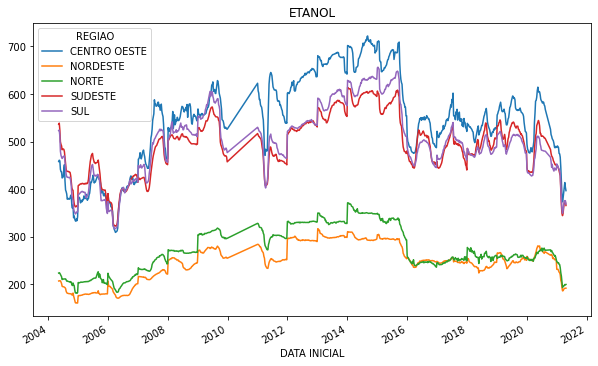

In [10]:
# I)
res_etanol = pd.merge(df_etanol.assign(grouper=df_etanol['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['ANO'].dt.to_period('Y')),
               how='inner', on='grouper')

# II)
res_etanol = res_etanol.drop(columns = {res_etanol.columns[3], res_etanol.columns[5]})

# III) 
res_etanol['RENDA'] = res_etanol['RENDA'].astype(float)

# IV)
res_etanol = res_etanol[res_etanol['ESTADO'] == res_etanol['UF']]


# V)
res_etanol["INDICADOR"] = res_etanol["RENDA"]/res_etanol["PRECO MEDIO REVENDA"]

co = res_etanol[res_etanol['REGIAO'] == 'CENTRO OESTE']

# VI) 
res_etanol = res_etanol.drop(columns = {res_etanol.columns[2], res_etanol.columns[3], res_etanol.columns[4],
                                       res_etanol.columns[5], res_etanol.columns[6]})

# VII)
res_etanol = res_etanol.groupby(['REGIAO', 'DATA INICIAL']).mean()

# VIII)
res_etanol.squeeze().unstack(level=0).plot(title = 'ETANOL', figsize = (10,6))

# GASOLINA COMUM 

<AxesSubplot:title={'center':'GASOLINA COMUM'}, xlabel='DATA INICIAL'>

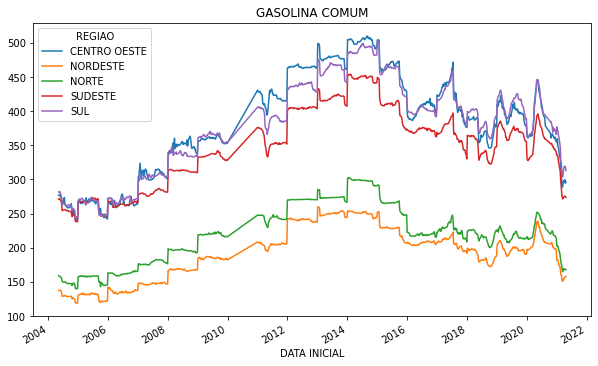

In [11]:
gc = pd.merge(df_gc.assign(grouper=df_gc['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['ANO'].dt.to_period('Y')),
               how='inner', on='grouper')

gc = gc.drop(columns = {gc.columns[3], gc.columns[5]})
gc['RENDA'] = gc['RENDA'].astype(float)

gc = gc[gc['ESTADO'] == gc['UF']]

gc["INDICADOR"] = gc["RENDA"]/gc["PRECO MEDIO REVENDA"]

gc = gc.drop(columns = {gc.columns[2], gc.columns[3], gc.columns[4],
                                       gc.columns[5], gc.columns[6]})

gc = gc.groupby(['REGIAO', 'DATA INICIAL']).mean()
gc.squeeze().unstack(level=0).plot(title = 'GASOLINA COMUM', figsize = (10,6))

# ÓLEO DIESEL 

<AxesSubplot:title={'center':'ÓLEO DIESEL'}, xlabel='DATA INICIAL'>

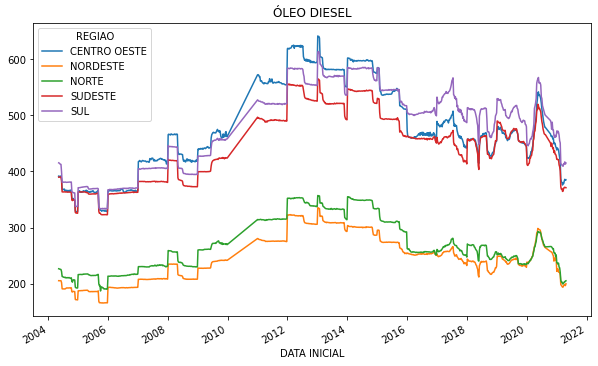

In [13]:
od = pd.merge(df_od.assign(grouper=df_od['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['ANO'].dt.to_period('Y')),
               how='inner', on='grouper')

od = od.drop(columns = {od.columns[3], od.columns[5]})
od['RENDA'] = od['RENDA'].astype(float)

od = od[od['ESTADO'] == od['UF']]

od["INDICADOR"] = od["RENDA"]/od["PRECO MEDIO REVENDA"]

od = od.drop(columns = {od.columns[2], od.columns[3], od.columns[4],
                                       od.columns[5], od.columns[6]})

od = od.groupby(['REGIAO', 'DATA INICIAL']).mean()
od.squeeze().unstack(level=0).plot(title = 'ÓLEO DIESEL', figsize = (10,6))

# ÓLEO DIESEL S10

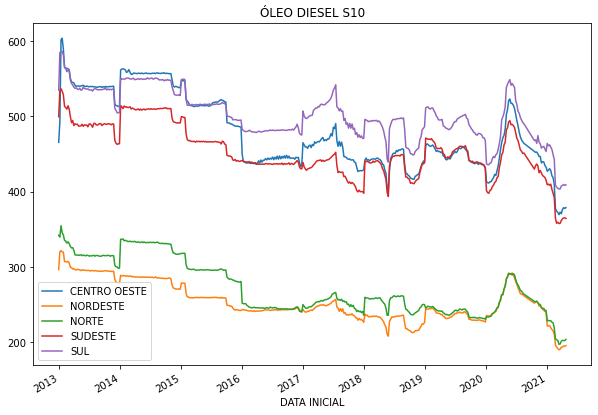

In [18]:
ods10 = pd.merge(df_ods10.assign(grouper=df_ods10['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['ANO'].dt.to_period('Y')),
               how='inner', on='grouper')

ods10 = ods10.drop(columns = {ods10.columns[3], ods10.columns[5]})
ods10['RENDA'] = ods10['RENDA'].astype(float)

ods10 = ods10[ods10['ESTADO'] == ods10['UF']]

ods10["INDICADOR"] = ods10["RENDA"]/ods10["PRECO MEDIO REVENDA"]

ods10 = ods10.drop(columns = {ods10.columns[2], ods10.columns[3], ods10.columns[4],
                                       ods10.columns[5], ods10.columns[6]})

ods10 = ods10.groupby(['REGIAO', 'DATA INICIAL']).mean()
ods10.squeeze().unstack(level=0).plot(title = 'ÓLEO DIESEL S10', figsize = (10,7)).legend(loc='lower left')

# Como Brasília pode modificar a participação da região Centro-Oeste 

<AxesSubplot:title={'center':'ETANOL'}, xlabel='DATA INICIAL'>

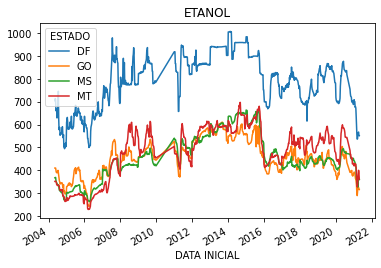

In [18]:
# VI) 
co = co.drop(columns = {co.columns[1], co.columns[3], co.columns[4],
                                       co.columns[5], co.columns[6]})

# VII)
co = co.groupby(['ESTADO', 'DATA INICIAL']).mean()

# VIII)
co.squeeze().unstack(level=0).plot(title = 'ETANOL')

# Por que decidimos separar a visualização por região e não por estado

<AxesSubplot:title={'center':'GASOLINA COMUM'}, xlabel='DATA INICIAL'>

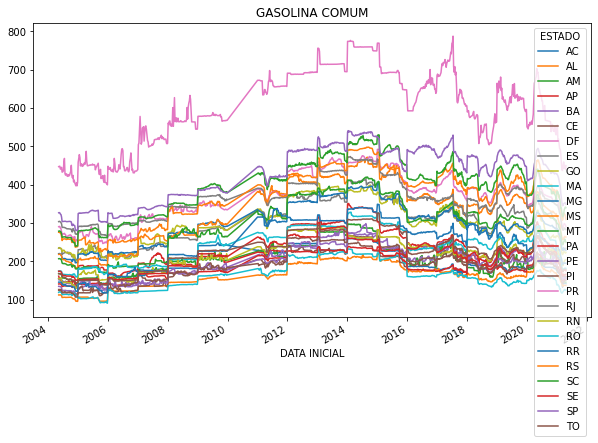

In [19]:
gc = pd.merge(df_gc.assign(grouper=df_gc['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['ANO'].dt.to_period('Y')),
               how='inner', on='grouper')

gc = gc.drop(columns = {gc.columns[3], gc.columns[5]})
gc['RENDA'] = gc['RENDA'].astype(float)

gc = gc[gc['ESTADO'] == gc['UF']]

gc["INDICADOR"] = gc["RENDA"]/gc["PRECO MEDIO REVENDA"]

gc = gc.drop(columns = {gc.columns[1], gc.columns[3], gc.columns[4],
                                       gc.columns[5], gc.columns[6]})

gc = gc.groupby(['ESTADO', 'DATA INICIAL']).mean()
gc.squeeze().unstack(level=0).plot(title = 'GASOLINA COMUM', figsize = (10,6))